In [3]:
'''
https://machinelearningmastery.com/feature-selection-for-regression-data/
https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
https://www.kaggle.com/mnoori/feature-selection-for-mlr-with-python
'''


'\nhttps://machinelearningmastery.com/feature-selection-for-regression-data/\nhttps://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a\nhttps://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b\nhttps://www.kaggle.com/mnoori/feature-selection-for-mlr-with-python\n'

In [4]:
'''
MAE (Mean absolute error) represents 
the difference between the original 
and predicted values extracted by 
averaged the absolute difference over 
the data set.
MAE = 1/n(sum(abs(y_test-y_pred)))
'''

'\nMAE (Mean absolute error) represents \nthe difference between the original \nand predicted values extracted by \naveraged the absolute difference over \nthe data set.\nMAE = 1/n(sum(abs(y_test-y_pred)))\n'

Importamos las librerias necesarias.
Necesitaremos sklearn que es una librería de machine learning que cuenta con algoritmos como regresión, clasificación, maquinas de soporte vectorial, entre otras.

In [4]:
import pandas as pd
import numpy as np
import os
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

Importamos el dataset y con la ayuda de os.chdir 
especificamos nuetro directorio de trabajo

In [5]:
#os.chdir("/home/nacho/Documents/ares_materials")
df1 = pd.read_csv('dataset1.csv', index_col=0)
print(df1.shape)
df1.head(5)

(48, 59)


BCUTi-1h      Xp-2d   MATS8dv     VE1_D    AXp-2d       ATSC3m   AATSC1s  \
0  13.895849   8.628555  0.044544  4.564680  0.301843  -256.139555 -0.047696   
1  13.648456  12.573157  0.112254  5.263012  0.338144 -2045.543729 -0.090539   
2  13.646090   8.080736 -0.011131  4.492360  0.321045  -215.077577 -0.092209   
3  13.640822   6.345515 -0.038704  4.004890  0.337185   -13.175728 -0.110932   
4  13.640270   6.165554 -0.041295  3.954352  0.338898     6.926141 -0.112568   

     MATS2i     SdCH2  SsOH  ...   AATSC5s    MATS7c  MATS1dv.1  Vinyl  \
0  0.041813  4.854322   0.0  ... -0.062835 -0.039117   0.323880    0.0   
1  0.079945  4.767247   0.0  ... -0.381381 -0.129256   0.369861    0.0   
2 -0.055423  3.314185   0.0  ... -0.186314 -0.107089   0.307180    0.0   
3 -0.062564  3.720706   0.0  ... -0.158126 -0.101172   0.244031    0.0   
4 -0.063436  3.755157   0.0  ... -0.155055 -0.100625   0.237512    0.0   

      ATSC2Z    AMID_C  MATS1s.1   AATSC0p      BIC2    out  
0 -58.195687  1.382489 -0.014712  0.299177  0.648014  1.544  
1  91.515649  1.331832 -0.040447  0.316465  0.607980  1.514  
2 -80.361692  1.382212 -0.041022  0.320449  0.688827  1.542  
3 -79.593670  1.378382 -0.034925  0.328827  0.674851  1.559  
4 -79.700135  1.377603 -0.034132  0.329908  0.673331  1.560  

[5 rows x 59 columns]

In [7]:
# exploratory data analysis

In [4]:
df1.info()
#No hay datos nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 59 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BCUTi-1h     48 non-null     float64
 1   Xp-2d        48 non-null     float64
 2   MATS8dv      48 non-null     float64
 3   VE1_D        48 non-null     float64
 4   AXp-2d       48 non-null     float64
 5   ATSC3m       48 non-null     float64
 6   AATSC1s      48 non-null     float64
 7   MATS2i       48 non-null     float64
 8   SdCH2        48 non-null     float64
 9   SsOH         48 non-null     float64
 10  ATS2pe       48 non-null     float64
 11  ETA_eta_RL   48 non-null     float64
 12  MATS2m       48 non-null     float64
 13  VSA_EState7  48 non-null     float64
 14  VR3_DzZ      48 non-null     float64
 15  GATS1se      48 non-null     float64
 16  VR2_Dzare    48 non-null     float64
 17  ATSC0v       48 non-null     float64
 18  SMR_VSA1     48 non-null     float64
 19  MATS3i    

In [9]:
df1.isnull().sum()

BCUTi-1h       0
Xp-2d          0
MATS8dv        0
VE1_D          0
AXp-2d         0
ATSC3m         0
AATSC1s        0
MATS2i         0
SdCH2          0
SsOH           0
ATS2pe         0
ETA_eta_RL     0
MATS2m         0
VSA_EState7    0
VR3_DzZ        0
GATS1se        0
VR2_Dzare      0
ATSC0v         0
SMR_VSA1       0
MATS3i         0
AATS1pe        0
VSA_EState1    0
nBondsM        0
VE1_Dzp        0
SRW09          0
EState_VSA2    0
Mp             0
bpol           0
nFAHRing       0
C1SP3          0
AETA_beta      0
SlogP_VSA1     0
LogEE_Dzm      0
MATS1dv        0
GATS6i         0
SpAD_Dzp       0
MATS1d         0
BCUTs-1l       0
MATS1s         0
ATSC1s         0
BalabanJ       0
AATS5p         0
GATS3Z         0
IC4            0
AATS0m         0
TMPC10         0
Xch-6d         0
AATSC3dv       0
BCUTd-1l       0
AATSC5s        0
MATS7c         0
MATS1dv.1      0
Vinyl          0
ATSC2Z         0
AMID_C         0
MATS1s.1       0
AATSC0p        0
BIC2           0
out           

In [5]:
df1.describe().T

count         mean         std          min          25%  \
BCUTi-1h      48.0    13.635846    0.087845    13.345684    13.640558   
Xp-2d         48.0     7.075754    1.378542     4.857116     5.974350   
MATS8dv       48.0    -0.075124    0.141192    -0.295976    -0.227542   
VE1_D         48.0     4.211547    0.353085     3.579479     3.912899   
AXp-2d        48.0     0.330706    0.009325     0.301843     0.323345   
ATSC3m        48.0  -215.245479  331.874718 -2045.543729  -371.520001   
AATSC1s       48.0    -0.074106    0.029874    -0.117736    -0.092551   
MATS2i        48.0    -0.067515    0.036332    -0.126777    -0.092044   
SdCH2         48.0     3.298525    0.701637     2.259984     2.501181   
SsOH          48.0     0.626577    1.210938     0.000000     0.000000   
ATS2pe        48.0   402.812618   87.764315   291.836398   317.012096   
ETA_eta_RL    48.0     8.972902    1.438797     6.580443     7.662622   
MATS2m        48.0    -0.080708    0.035556    -0.127631    -0.098054   
VSA_EState7   48.0     1.952166    0.406753     0.302839     1.813152   
VR3_DzZ       48.0     4.997865    0.439039     4.150364     4.648486   
GATS1se       48.0     0.776783    0.041964     0.708443     0.744220   
VR2_Dzare     48.0     4.587038    0.421350     3.827748     4.232893   
ATSC0v        48.0  1952.170645  397.833824  1468.570142  1541.229507   
SMR_VSA1      48.0    20.832360    4.325381    12.088283    17.976221   
MATS3i        48.0    -0.162994    0.093326    -0.495762    -0.231228   
AATS1pe       48.0     6.480469    0.048711     6.381255     6.441583   
VSA_EState1   48.0    11.597561    2.248190     8.605231     9.313572   
nBondsM       48.0     5.169896    1.296053     2.554000     4.675750   
VE1_Dzp       48.0     4.213911    0.355861     3.579529     3.917424   
SRW09         48.0     0.049293    0.341514     0.000000     0.000000   
EState_VSA2   48.0    25.152371    8.557480     5.404429    25.595403   
Mp            48.0     0.665589    0.010371     0.638771     0.658342   
bpol          48.0    28.289385    6.406333    20.530316    22.211889   
nFAHRing      48.0     0.000000    0.000000     0.000000     0.000000   
C1SP3         48.0     4.530708    1.366812     2.924000     3.403000   
AETA_beta     48.0     0.901446    0.091240     0.726038     0.837315   
SlogP_VSA1    48.0     0.348141    0.891980     0.000000     0.000000   
LogEE_Dzm     48.0    72.872293   20.867197    41.882370    53.409617   
MATS1dv       48.0     0.285738    0.037070     0.188655     0.273201   
GATS6i        48.0     0.939838    0.074284     0.835855     0.878949   
SpAD_Dzp      48.0   242.542247   69.570807   135.824628   179.658029   
MATS1d        48.0     0.271686    0.039662     0.213912     0.242766   
BCUTs-1l      48.0     1.271244    0.076139     1.138313     1.209107   
MATS1s        48.0    -0.036327    0.007696    -0.057867    -0.041500   
ATSC1s        48.0    -2.289529    1.127759    -4.359277    -2.965560   
BalabanJ      48.0     3.419615    0.724356     2.488991     2.816612   
AATS5p        48.0     1.258177    0.058552     1.129080     1.220179   
GATS3Z        48.0     0.883126    0.058635     0.832750     0.849576   
IC4           48.0     3.807275    0.120501     3.511833     3.731307   
AATS0m        48.0   118.126396    4.424352   105.845094   116.192235   
TMPC10        48.0   231.611187   59.272357   152.748000   186.592750   
Xch-6d        48.0     0.033398    0.028230     0.000000     0.024208   
AATSC3dv      48.0    -0.101105    0.127120    -0.280961    -0.201928   
BCUTd-1l      48.0     0.968713    0.001820     0.965591     0.967140   
AATSC5s       48.0    -0.145481    0.045734    -0.381381    -0.158094   
MATS7c        48.0    -0.043033    0.067991    -0.129256    -0.100762   
MATS1dv.1     48.0     0.285738    0.037070     0.188655     0.273201   
Vinyl         48.0     0.037562    0.093174     0.000000     0.000000   
ATSC2Z        48.0   -82.924020   33.063973  -125.516986  -101.598949  

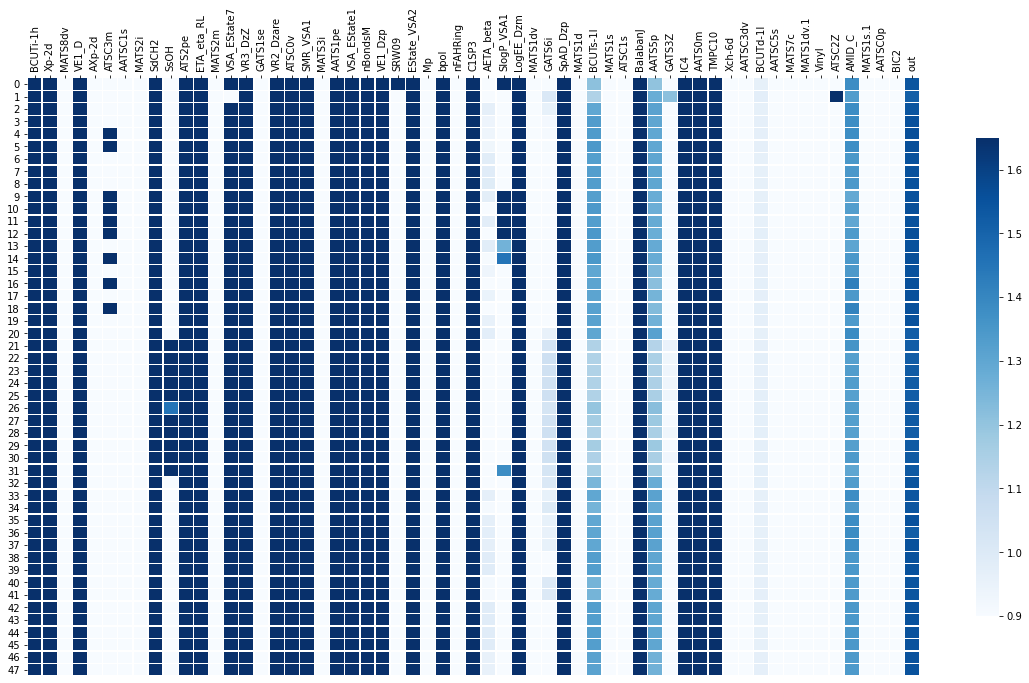

In [6]:
#ColorMap
fig, ax = plt.subplots()
fig.set_size_inches(20, 11)
ax.xaxis.tick_top()
sns.heatmap(df1, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})

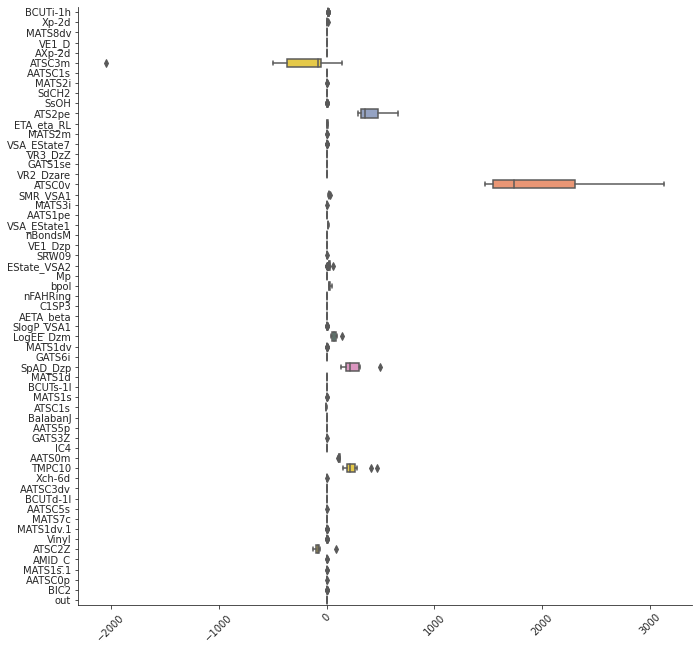

In [7]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.xticks(rotation=45)
sns.despine()


In [8]:
#Columnas que tienen una desviacion estandar mas alta que el promedio de las demas
df_std = df1.describe().loc['std',:][df1.describe().loc['std',:] > df1.describe().loc['std',:].mean()]
print(df_std)
df_std = df_std.to_frame()
columns_std = list(df_std.index)
columns_std.append('out')
df1[columns_std].head()

ATSC3m       331.874718
ATS2pe        87.764315
ATSC0v       397.833824
LogEE_Dzm     20.867197
SpAD_Dzp      69.570807
TMPC10        59.272357
ATSC2Z        33.063973
Name: std, dtype: float64


ATSC3m      ATS2pe       ATSC0v   LogEE_Dzm    SpAD_Dzp   TMPC10  \
0  -256.139555  506.438430  2272.518275   89.157917  283.765048  465.647   
1 -2045.543729  663.264328  3131.459122  146.864357  491.605118  416.511   
2  -215.077577  444.735096  2153.527014   86.298689  284.844531  279.456   
3   -13.175728  351.860168  1732.525797   61.725428  204.628987  215.264   
4     6.926141  342.353415  1689.535403   59.196361  196.394141  208.536   

      ATSC2Z    out  
0 -58.195687  1.544  
1  91.515649  1.514  
2 -80.361692  1.542  
3 -79.593670  1.559  
4 -79.700135  1.560

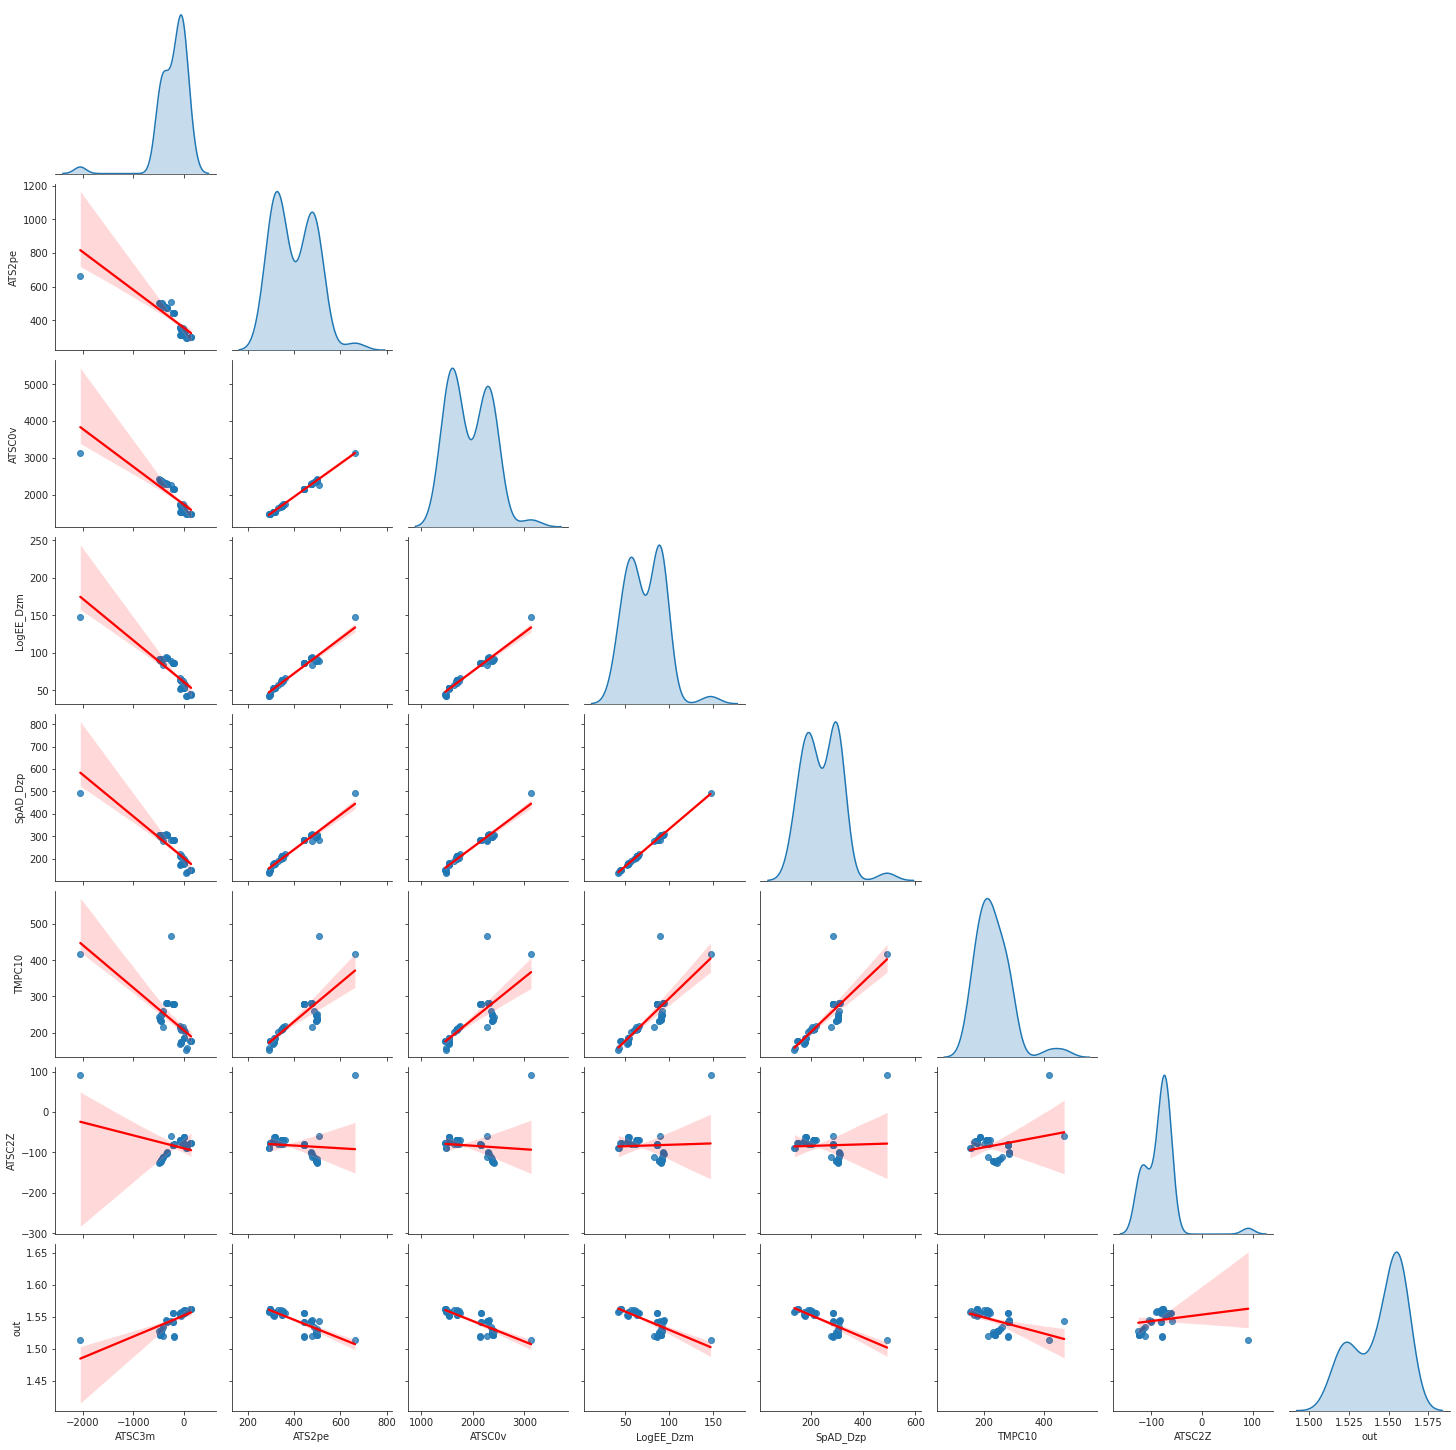

In [10]:
sns.pairplot(df1[columns_std], corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}})
#solo dos columnas que tienen alto std tienen baja correlacion

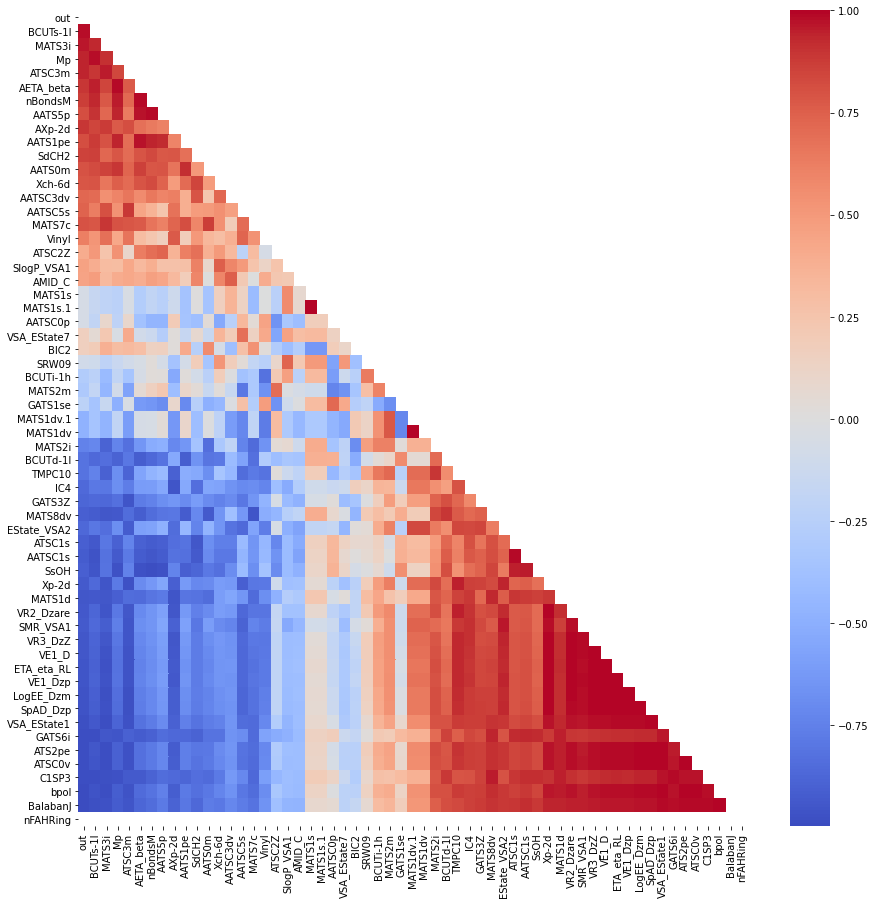

In [6]:
corr = df1.corr()
#sort_corr= corr['out'].abs().sort_values(ascending=False)
sort_corr= corr['out'].sort_values(ascending=False)
corr_matrix = corr[sort_corr.index].corr()
matrix = np.triu(corr_matrix)
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr_matrix, annot=False, mask=matrix,cmap='coolwarm')
#los valores en color suave tienen baja correlacion

In [7]:
#Valor minimo de correlacion
c = 0.5
#c = abs(corr['out']).mean()
#c = 0.25

BalabanJ       0.895082
bpol           0.865197
BCUTs-1l       0.863497
C1SP3          0.854826
ATSC0v         0.848976
ATS2pe         0.847107
GATS6i         0.830273
VSA_EState1    0.822117
SpAD_Dzp       0.801125
LogEE_Dzm      0.795229
MATS3i         0.794417
Mp             0.778135
VE1_Dzp        0.776716
ETA_eta_RL     0.775315
VE1_D          0.770636
VR3_DzZ        0.757802
SMR_VSA1       0.735974
VR2_Dzare      0.733210
MATS1d         0.729479
Xp-2d          0.728739
ATSC3m         0.728736
SsOH           0.724070
AETA_beta      0.702466
AATSC1s        0.698552
nBondsM        0.676880
ATSC1s         0.654170
EState_VSA2    0.642814
MATS8dv        0.631221
AATS5p         0.611362
AXp-2d         0.605869
AATS1pe        0.574717
GATS3Z         0.565102
SdCH2          0.539235
IC4            0.525599
AATS0m         0.522260
TMPC10         0.500996
Name: out, dtype: float64


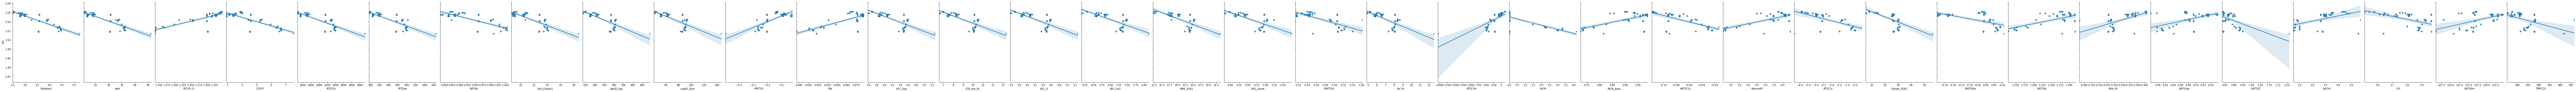

In [8]:
#columnas que tienen una correlacion mayor 
high_corr= abs(corr['out'])[abs(corr['out']) > c]
#high_corr= corr['out'][corr['out'] > corr.out.mean()]
high_corr = high_corr.drop(labels=['out'])
print(high_corr.sort_values(ascending=False))
columns_high_corr = list(high_corr.sort_values(ascending=False).to_frame().index)
#plot
sns.pairplot(df1, x_vars=columns_high_corr, y_vars=["out"], height=5, aspect=.8, kind="reg")
#for column in columns_high_corr:
#    sns.jointplot(data = df1, x =column, y ="out")

In [10]:
#columnas que tienen una correlacion menor 
low_corr= abs(corr['out'])[abs(corr['out']) < c]
#low_corr= corr['out'][corr['out'] < corr.out.mean()]
print(low_corr.sort_values())
df_low_corr = low_corr.sort_values().to_frame()
columns_low_corr = list(df_low_corr.index)

BIC2           0.002479
VSA_EState7    0.003475
SRW09          0.007759
AATSC0p        0.016005
BCUTi-1h       0.065374
MATS2m         0.124478
MATS1s         0.127039
MATS1s.1       0.127039
GATS1se        0.163473
AMID_C         0.178566
SlogP_VSA1     0.203590
ATSC2Z         0.222257
Vinyl          0.233570
MATS1dv        0.252241
MATS1dv.1      0.252241
MATS7c         0.391496
MATS2i         0.415266
AATSC5s        0.419826
BCUTd-1l       0.438509
AATSC3dv       0.448362
Xch-6d         0.479747
Name: out, dtype: float64


In [11]:
#se eliminan las columnas con poca correlacion (Opcional)
df_highcorr = df1.drop(df1[columns_low_corr],axis=1)
df_highcorr.shape

(48, 38)

In [ ]:
#Multivariate Regression

In [82]:
#Dividimos nuestros datos en "x" y "y" excluyendo la columna out

In [12]:
#Elije el dataset completo o solo las columnas con alta correlacion

#X = df1.loc[:, df1.columns != 'out']
#y = df1.loc[:, df1.columns == 'out'].values.ravel()
X = df_highcorr.loc[:, df_highcorr.columns != 'out']
y = df_highcorr.loc[:, df_highcorr.columns == 'out'].values.ravel()

In [ ]:
Dividimos el dataset en datos de entrenamiento y datos que nos servirán para el testing (en este caso el 33% de los datos).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [55]:
#Tune the Number of Selected Features
def RKFold(X,y):
    # define the evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the pipeline to evaluate
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # define the grid
    grid = dict()
    grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
    # define the grid search
    search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
    # perform the search
    results = search.fit(X, y)
    # summarize best
    print('Best MAE: %.5f' % results.best_score_)
    print('Best Config: %s' % results.best_params_)
    # summarize all
    means = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']
    for mean, param in zip(means, params):
        print(">%.5f with: %r" % (mean, param))
    return results.best_params_['sel__k']

best_params = RKFold(X,y)

Best MAE: -0.00015
Best Config: {'sel__k': 28}
>-0.00052 with: {'sel__k': 17}
>-0.00125 with: {'sel__k': 18}
>-0.00148 with: {'sel__k': 19}
>-0.00130 with: {'sel__k': 20}
>-0.00177 with: {'sel__k': 21}
>-0.00259 with: {'sel__k': 22}
>-0.00289 with: {'sel__k': 23}
>-0.00247 with: {'sel__k': 24}
>-0.00192 with: {'sel__k': 25}
>-0.00198 with: {'sel__k': 26}
>-0.00088 with: {'sel__k': 27}
>-0.00015 with: {'sel__k': 28}
>-0.00065 with: {'sel__k': 29}
>-0.00040 with: {'sel__k': 30}
>-0.00064 with: {'sel__k': 31}
>-0.00051 with: {'sel__k': 32}
>-0.00041 with: {'sel__k': 33}
>-0.00037 with: {'sel__k': 34}
>-0.00043 with: {'sel__k': 35}
>-0.00036 with: {'sel__k': 36}
>-0.00036 with: {'sel__k': 37}


In [56]:
# feature selection
def select_features(best_params, X, y):
    fs = SelectKBest(score_func=mutual_info_regression, k=best_params)
    # learn relationship from training data
    fs.fit(X,y)
    cols = fs.get_support(indices=True)
    X_fs = X.iloc[:,cols]
    X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_fs, y, test_size=0.33, random_state=1)
    return X_train_fs, X_test_fs, fs, X_fs

# feature selection
X_train_fs, X_test_fs, fs, X_fs= select_features(best_params, X, y)



Model Selection: realizamos el entrenamiento utilizando varios modelos de regresión diferentes

In [57]:
classifiers = [
    svm.SVR(),
    linear_model.Ridge(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.LassoCV(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
    ]

Definimos las llaves del diccionario y lo creamos junto con una lista vacia

In [58]:
dict_list = ['name', 'y_pred', 'mae', 'model']
class_dict = {}
class_list = []

Iteramos todos los modelos y almacenamos el atributo name y cada modelo calcula los modelos más óptimos para los pesos utilizando los valores de entrada y salida de los datos de entrenamiento.

Utilizamos mean absolute error (MAE) para encontrar cual de todos los modelos nos da el error mas pequeño.

In [59]:
for i, classifier in enumerate(classifiers):
    class_dict = {}
    class_dict[dict_list[0]] = (classifiers[i].__class__.__name__)
    clf = classifier
    pipeline = Pipeline(steps=[
    #('scaler', MinMaxScaler()),
    #('scaler', RobustScaler()),
    ('scaler', StandardScaler()),
    ('model', clf)
    ])

    pipeline.fit(X_train_fs, y_train)
    y_pred = pipeline.predict(X_test_fs)

    #pipeline.fit(X_train, y_train)
    #y_pred = pipeline.predict(X_test)

    class_dict[dict_list[1]] = y_pred
    mae = metrics.mean_absolute_error(y_test, y_pred)
    class_dict[dict_list[2]] = mae
    class_dict[dict_list[3]] = clf
    class_list.append(class_dict)

Analizamos los datos 'mae' del diccionario y encontramos el más pequeño, en este caso fue.

In [60]:
minl = []
for dicts in class_list:
    print(dicts['name'],':',dicts['mae'])
    minl.append(dicts['mae'])

min_mae = min(minl)

def return_best_mae(class_list, min_mae):
    for dicts in class_list:
        if dicts['mae'] == min_mae:
            return dicts

best_mae = return_best_mae(class_list, min_mae)
print(best_mae)
#with best model do a hiperparameter tuning


SVR : 0.012000000000000038
Ridge : 0.0037341945505353358
SGDRegressor : 0.09668871581738195
BayesianRidge : 0.004340084752034554
LassoLars : 0.013578124999999969
LassoCV : 0.0044207633061793955
ARDRegression : 0.004655161196493202
PassiveAggressiveRegressor : 0.044995476297685785
TheilSenRegressor : 0.004674010276794455
LinearRegression : 0.004214113794346053
{'name': 'Ridge', 'y_pred': array([1.5456652 , 1.52190506, 1.55396811, 1.54590016, 1.5456652 ,
       1.55612334, 1.5278644 , 1.53322083, 1.55396811, 1.52783938,
       1.5231381 , 1.55536525, 1.51820596, 1.54297393, 1.55536525,
       1.54284578]), 'mae': 0.0037341945505353358, 'model': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)}


In [ ]:
'''
WITH HIGH CORR DATA AND FEATURE SELECTION
{'name': 'BayesianRidge', 'y_pred': array([1.54516922, 1.52425139, 1.55374143, 1.54541806, 1.54516922,
       1.55588899, 1.52931748, 1.53386998, 1.55374143, 1.52922606,
       1.52516904, 1.555227  , 1.52149844, 1.54231889, 1.555227  ,
       1.54218316]), 'mae': 0.003681995423639478, 'model': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)}
'''

In [ ]:
'''
WITH HIGH CORRELATION DATA AND NO FEATURE SELECTION
{'name': 'BayesianRidge', 'y_pred': array([1.54528197, 1.52248676, 1.55455364, 1.54557025, 1.54528197,
       1.5565687 , 1.52645666, 1.53282866, 1.55455364, 1.52780615,
       1.52341837, 1.55584439, 1.51969194, 1.54197984, 1.55584439,
       1.54182259]), 'mae': 0.0037847423337281777, 'model': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)}
'''

In [ ]:
'''
WITH HIGH CORR DATA AND FEATURE SELECTION
{'name': 'LinearRegression', 'y_pred': array([1.54369903, 1.52056455, 1.55432933, 1.54360333, 1.54369903,
       1.55712336, 1.52616507, 1.53423661, 1.55432933, 1.52827235,
       1.52306229, 1.55585731, 1.51307132, 1.5447952 , 1.55585731,
       1.5448474 ]), 'mae': 0.0039378484031668826, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
'''

In [ ]:
'''
WITH ALL DATA (no correlation or feature selection)
{'name': 'BayesianRidge', 'y_pred': array([1.5448769 , 1.52247832, 1.55469369, 1.54512147, 1.5448769 ,
       1.55666446, 1.52603901, 1.53295677, 1.55469369, 1.52793525,
       1.52354839, 1.55612351, 1.51926809, 1.54207539, 1.55612351,
       1.54194198]), 'mae': 0.0037418050873889858, 'model': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)}
'''

Graficamos los resultados

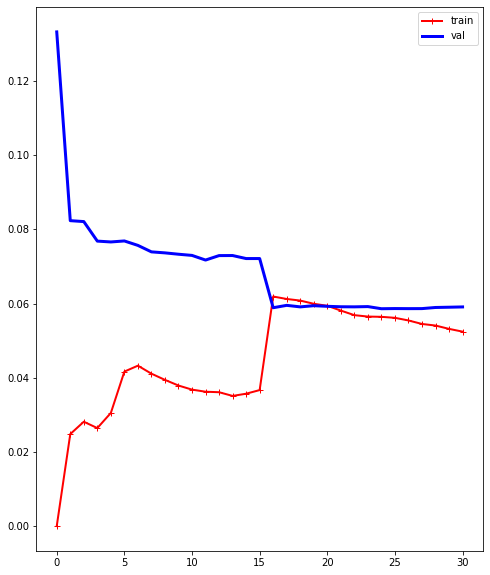

In [61]:
#learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns = X.columns)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val),columns = X.columns)

    train_errors, val_errors = [], []
    for m in range(1, len(X_train_scaled)):
        model.fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = model.predict(X_train_scaled[:m])
        y_val_predict = model.predict(X_val_scaled)
        train_errors.append(metrics.mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(metrics.mean_absolute_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
#con feature selection
plot_learning_curves(model = linear_model.Ridge(), X = X_fs, y = y)

#sin feature selection
#plot_learning_curves(model = linear_model.Ridge(), X = X, y = y)


Text(0.5, 1.0, 'Feature importance using Ridge\nwith MAE: 0.0037341945505353358')

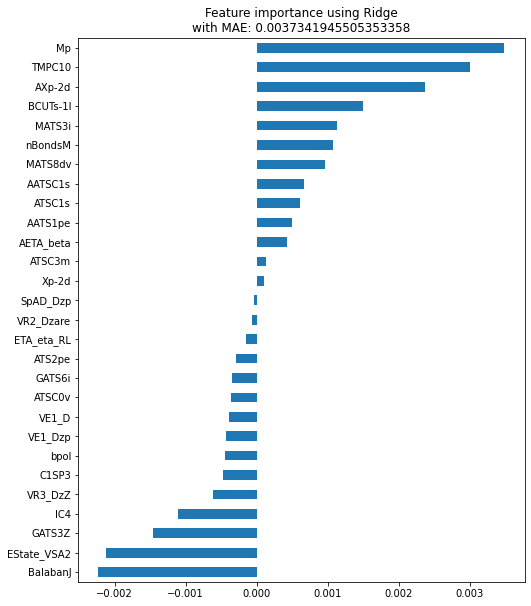

In [62]:
#Feature Importance

fs_index = fs.get_support(indices=True)
fs_columns = X.iloc[:,fs_index].columns
coef = pd.Series(best_mae['model'].coef_, index = fs_columns)
#coef = pd.Series(best_mae['model'].coef_, index = X.columns)

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(f"Feature importance using {best_mae['name']}\nwith MAE: {best_mae['mae']}")


In [228]:
high_corr.sort_values(ascending=False)

BalabanJ       0.895082
bpol           0.865197
BCUTs-1l       0.863497
C1SP3          0.854826
ATSC0v         0.848976
ATS2pe         0.847107
GATS6i         0.830273
VSA_EState1    0.822117
SpAD_Dzp       0.801125
LogEE_Dzm      0.795229
MATS3i         0.794417
Mp             0.778135
VE1_Dzp        0.776716
ETA_eta_RL     0.775315
VE1_D          0.770636
VR3_DzZ        0.757802
SMR_VSA1       0.735974
VR2_Dzare      0.733210
MATS1d         0.729479
Xp-2d          0.728739
ATSC3m         0.728736
SsOH           0.724070
AETA_beta      0.702466
AATSC1s        0.698552
nBondsM        0.676880
ATSC1s         0.654170
EState_VSA2    0.642814
MATS8dv        0.631221
AATS5p         0.611362
AXp-2d         0.605869
AATS1pe        0.574717
GATS3Z         0.565102
SdCH2          0.539235
IC4            0.525599
AATS0m         0.522260
TMPC10         0.500996
Name: out, dtype: float64

Text(0.5, 0, 'Errors')

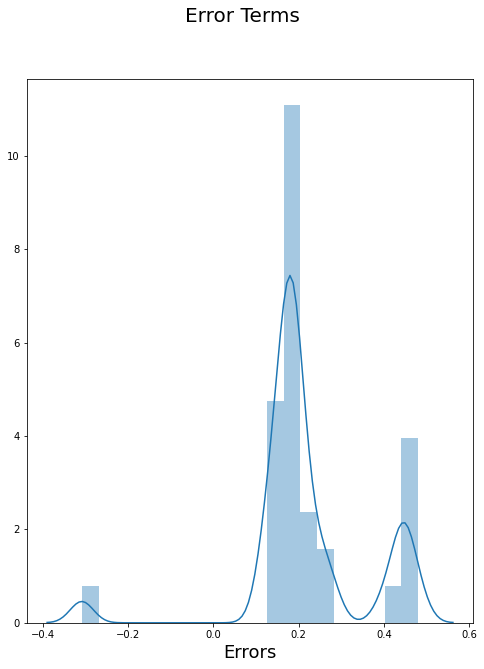

In [63]:
#Residual Analysis

y_train_price = best_mae['model'].predict(X_train_fs)
#y_train_price = best_mae['model'].predict(X_train)

#plot
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)    

No handles with labels found to put in legend.


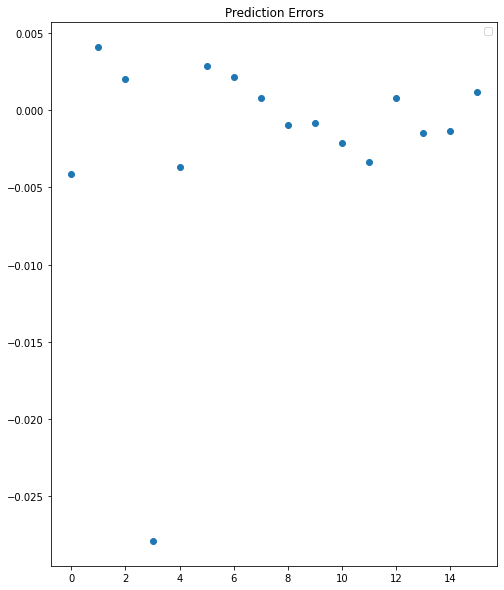

In [65]:
plt.plot(y_test - best_mae['y_pred'],marker='o',linestyle='')
plt.title("Prediction Errors")
plt.legend()
plt.show() 

In [ ]:
#Hyperparameter CV best model

In [66]:
#y_train, y_test

# feature selection
#X_fs,y
#X_train_fs, X_test_fs, fs
final_X_train = X_train_fs.copy()
final_X_test = X_test_fs.copy()

#No feature selection
#X, y
#X_train, X_test
#final_X_train = X_train.copy()
#final_X_test = X_test.copy()

from sklearn.linear_model import RidgeCV
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

scaler = StandardScaler().fit(final_X_train)
X_train_scaled = pd.DataFrame(scaler.transform(final_X_train),columns = final_X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(final_X_test),columns = final_X_test.columns)

# fit model
model.fit(X_train_scaled, y_train)
y_pred_ridge = model.predict(X_test_scaled)
# MEA results
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
print(mae_ridge)

0.003735116133308264


In [67]:
import shap

explainer = shap.KernelExplainer(model.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

100%|██████████| 16/16 [00:10<00:00,  1.53it/s]


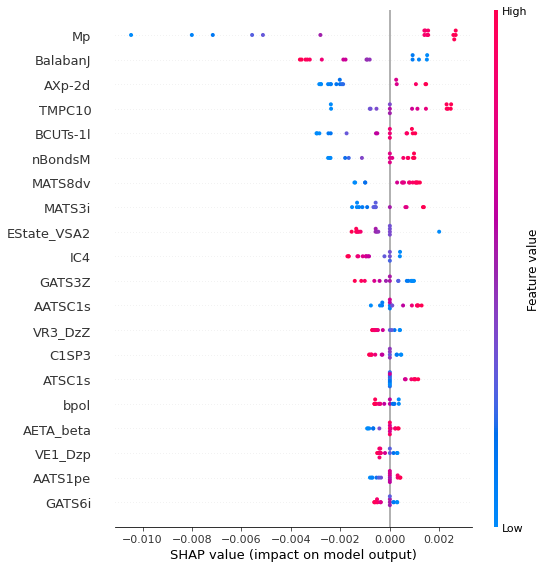

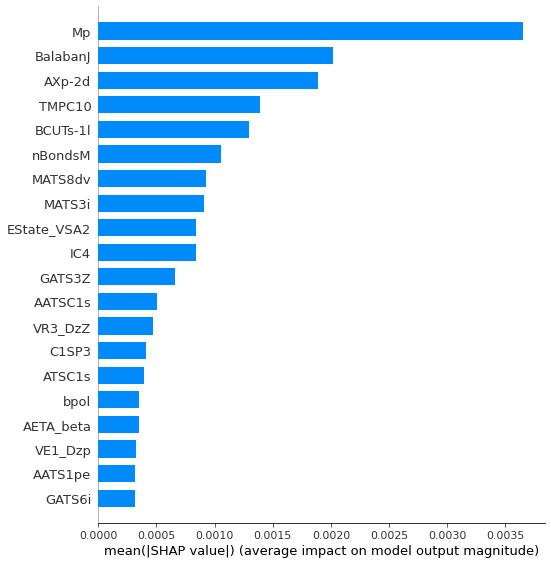

In [75]:
shap.summary_plot(shap_values, X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

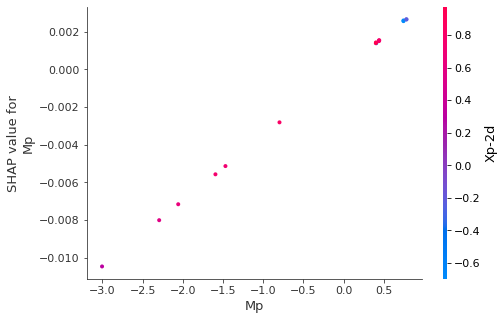

In [69]:
shap.initjs()
shap.dependence_plot("Mp", shap_values, X_test_scaled)

In [70]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[10,:], X_test_scaled.iloc[10,:])

In [71]:
y_test[10]

1.521

In [72]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_scaled)